# DIGIT CLASSIFICATION WITH MNIST DATA


### Understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

In [6]:
train = pd.read_csv("C:\personal\data science\coding ninjas\mnsit\\train.csv")
test = pd.read_csv("C:\personal\data science\coding ninjas\mnsit\\test.csv")

In [3]:
train.shape

(42000, 785)

In [8]:
test.shape

(28000, 784)

In [9]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Each row of the data set consists of one picture. The first column contains the target and the rest of the columns contain pixels of the image. We need to separate training and test values and convert it to numpy array

### Printing one image 

In [10]:
img = train.iloc[2].values

In [11]:
x = img[:-1]
y = img[-1]

In [12]:
x.shape

(784,)

In [13]:
x = x.reshape(28,28)

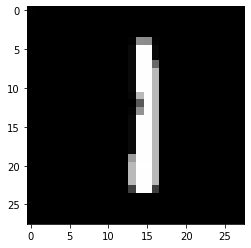

In [14]:
plt.imshow(x, cmap = "gray")

### Function to be called to print image

In [15]:
def printImg(img):
    img = img.reshape(28,28)
    plt.imshow(img, cmap = "gray")

### Applying KNN algorithm to given dataset

##### Setting X and y values

In [16]:
X = train.iloc[:,1:].values
y = train.iloc[:, 0].values

In [17]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Distance function and KNN algorithm

In [19]:
def distance(p1, p2):
    """ euclidean distance between p1 and p2 """
    return np.sum((p1-p2)**2)**0.5

In [29]:
def kNN(X, y, x_query, k = 7):
    m = X.shape[0]
    
    all_distances = []
    
    for i in range(m):
        d = distance(X[i], x_query)
        all_distances.append((d, y[i]))
    
    all_distances = sorted(all_distances)
    vals = all_distances[:k]
    vals = np.array(vals)
    #print(vals)
    
    
    new_vals = np.unique(vals[:,1],return_counts = True)
    
    index = new_vals[1].argmax()
    pred = int(new_vals[0][index])
    return pred

### Making predictions


In [21]:
#X_test = test.iloc[:,:-1].values
#y_test = test.iloc[:,-1].values
#test = test.values

In [22]:
print(X_train.shape,y_train.shape,y_train)

(33600, 784) (33600,) [6 5 3 ... 2 6 0]


In [36]:
idx = 57

In [37]:
kNN(X_train,y_train,X_test[idx],k=7)

2

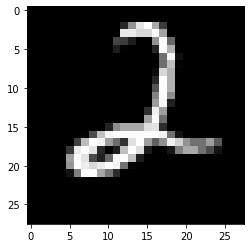

In [38]:
printImg(X_test[idx])

### The prediction made and image plotted match. Hence our algorithm works well